<a href="https://colab.research.google.com/github/angel870326/Monthly-Revenue-Forecasting/blob/main/006_%E7%87%9F%E6%94%B6%E5%85%AC%E5%91%8A%E6%97%A5check.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> 2023.03.14 Ssu-Yun Wang<br/>
[Github @angel870326](https://github.com/angel870326)

# **營收公告日 check**

觀察各公司是否有中間月份突然缺失營收公告日者

*Modified from 001_data_partitioning_v1.ipynb*


### Contents

*   Raw Data
*   Reformat
*   Industries
    *   TSE 上市櫃公司產業別
    *   分為金融業與非金融業
*   Missing Value
    *   Months
    *   Companies
    *   Conclusion



結論：
所有上市櫃公司都是從 2013-01 開始才有營收公告日，且沒有中間突然缺失營收公告日者



In [1]:
# sConnect to the Google Drive
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## **1. Raw Data**

資料名稱：月營收盈餘

資料期間：1988年1月至2023年1月

資料範圍：上市、櫃公司

資料來源：TEJ Company DB

In [3]:
raw_data = pd.read_excel('/content/gdrive/MyDrive/論文/資料集/raw/198801-202301 上市櫃公司月營收.xlsx')
del raw_data['以合併為主單月營收(千元)']
raw_data = raw_data[raw_data["公司"].str.contains('^[a-zA-Z]') == False] # 刪除指數
raw_data

,公司,年月,營收發布日
0,1101 台泥,2023/01,2023/02/10
1,1102 亞泥,2023/01,2023/02/10
2,1103 嘉泥,2023/01,2023/02/10
3,1104 環泥,2023/01,2023/02/10
4,1108 幸福,2023/01,2023/02/10
...,...,...,...
458474,2904 匯僑,1988/01,NaN
458475,2905 三商,1988/01,NaN
458476,2913 農林,1988/01,NaN
458477,2915 潤泰全,1988/01,NaN


## **2. Reformat**

In [4]:
# Change "Y/m" into "Y-m"
raw_data['年月'] = raw_data['年月'].str.replace('/','-')
raw_data

,公司,年月,營收發布日
0,1101 台泥,2023-01,2023/02/10
1,1102 亞泥,2023-01,2023/02/10
2,1103 嘉泥,2023-01,2023/02/10
3,1104 環泥,2023-01,2023/02/10
4,1108 幸福,2023-01,2023/02/10
...,...,...,...
458474,2904 匯僑,1988-01,NaN
458475,2905 三商,1988-01,NaN
458476,2913 農林,1988-01,NaN
458477,2915 潤泰全,1988-01,NaN


In [5]:
# 營收發布日 str to datetime
raw_data['營收發布日'] = pd.to_datetime(raw_data['營收發布日'])
raw_data

,公司,年月,營收發布日
0,1101 台泥,2023-01,2023-02-10
1,1102 亞泥,2023-01,2023-02-10
2,1103 嘉泥,2023-01,2023-02-10
3,1104 環泥,2023-01,2023-02-10
4,1108 幸福,2023-01,2023-02-10
...,...,...,...
458474,2904 匯僑,1988-01,NaT
458475,2905 三商,1988-01,NaT
458476,2913 農林,1988-01,NaT
458477,2915 潤泰全,1988-01,NaT


In [6]:
# Check if there is NaN in each column (241179)
raw_data_nan = pd.DataFrame(raw_data.isnull().sum(), columns=['nan_count'])
raw_data_nan['nan_percent'] = raw_data_nan['nan_count'] / len(raw_data)
raw_data_nan

,nan_count,nan_percent
公司,0,0.000000
年月,0,0.000000
營收發布日,241179,0.544862


In [7]:
# Pivot table
raw_data_pvt = raw_data.pivot_table(values='營收發布日', 
		                                index='公司', 
	   	                              columns='年月')
del raw_data_pvt['2023-01']  # delete 2023-01
raw_data_pvt

年月,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,...,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
公司,,,,,,,,,,,,,,,,,,,,,
1101 台泥,2013-02-18,2013-03-08,2013-04-10,2013-05-10,2013-06-10,2013-07-10,2013-08-09,2013-09-10,2013-10-11,2013-11-11,...,2022-04-11,2022-05-10,2022-06-10,2022-07-11,2022-08-10,2022-09-12,2022-10-06,2022-11-10,2022-12-09,2023-01-10
1102 亞泥,2013-02-08,2013-03-08,2013-04-10,2013-05-10,2013-06-10,2013-07-10,2013-08-09,2013-09-10,2013-10-09,2013-11-08,...,2022-04-08,2022-05-10,2022-06-10,2022-07-08,2022-08-10,2022-09-08,2022-10-07,2022-11-10,2022-12-09,2023-01-10
1103 嘉泥,2013-02-18,2013-03-11,2013-04-10,2013-05-10,2013-06-10,2013-07-10,2013-08-09,2013-09-10,2013-10-11,2013-11-11,...,2022-04-11,2022-05-10,2022-06-10,2022-07-11,2022-08-10,2022-09-12,2022-10-11,2022-11-10,2022-12-12,2023-01-10
1104 環泥,2013-02-08,2013-03-08,2013-04-10,2013-05-10,2013-06-10,2013-07-10,2013-08-09,2013-09-10,2013-10-09,2013-11-08,...,2022-04-11,2022-05-10,2022-06-10,2022-07-08,2022-08-10,2022-09-12,2022-10-11,2022-11-10,2022-12-09,2023-01-10
1108 幸福,2013-02-18,2013-03-08,2013-04-09,2013-05-10,2013-06-07,2013-07-10,2013-08-09,2013-09-09,2013-10-08,2013-11-08,...,2022-04-11,2022-05-09,2022-06-09,2022-07-08,2022-08-08,2022-09-08,2022-10-07,2022-11-08,2022-12-09,2023-01-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9951 皇田,2013-02-07,2013-03-07,2013-04-09,2013-05-10,2013-06-07,2013-07-08,2013-08-08,2013-09-06,2013-10-08,2013-11-06,...,2022-04-08,2022-05-10,2022-06-09,2022-07-08,2022-08-09,2022-09-12,2022-10-11,2022-11-10,2022-12-09,2023-01-10
9955 佳龍,2013-02-18,2013-03-08,2013-04-09,2013-05-10,2013-06-10,2013-07-09,2013-08-09,2013-09-10,2013-10-09,2013-11-08,...,2022-04-08,2022-05-10,2022-06-10,2022-07-06,2022-08-10,2022-09-06,2022-10-07,2022-11-09,2022-12-09,2023-01-10
9958 世紀鋼,2013-02-08,2013-03-10,2013-04-09,2013-05-10,2013-06-10,2013-07-10,2013-08-09,2013-09-10,2013-10-09,2013-11-08,...,2022-04-11,2022-05-09,2022-06-09,2022-07-11,2022-08-10,2022-09-08,2022-10-07,2022-11-10,2022-12-09,2023-01-09



由上表可以看出所有上市櫃公司都是從 2013-01 開始才有營收公告日

## **3. Industries**



### 3.1 TSE 上市櫃公司產業別

from *001_data_partitioning_v1.ipynb*

In [8]:
industry = pd.read_excel('/content/gdrive/MyDrive/論文/資料集/001_v1/上市櫃公司TSE產業.xlsx')
industry

,公司簡稱,TSE 產業別,TSE舊產業_名稱,TSE新產業_名稱
0,1101 台泥,1,水泥工業,水泥工業
1,1102 亞泥,1,水泥工業,水泥工業
2,1103 嘉泥,1,水泥工業,水泥工業
3,1104 環泥,1,水泥工業,水泥工業
4,1108 幸福,1,水泥工業,水泥工業
...,...,...,...,...
1783,9949 琉園,32,文化創意業,文化創意業
1784,9950 萬國通,3,塑膠工業,塑膠工業
1785,9951 皇田,5,電機機械,電機機械
1786,9960 邁達康,18,貿易百貨,貿易百貨


In [9]:
# 把產業名加上去
# raw_data.insert(loc=0, column='TSE新產業_名稱', value=np.nan)
# for index, row in industry.iterrows():
#   company = row['公司簡稱']
#   index_list = raw_data.index[raw_data['公司'] == company].tolist()
#   raw_data.loc[index_list,'TSE新產業_名稱'] = row['TSE新產業_名稱']
# raw_data

### 3.2 分為金融業與非金融業
data_fin & data_nonfin

In [10]:
# Industry filter
def industryFilter(originalD: pd.DataFrame, cList: list):
  filter = originalD.index.isin(cList)
  newD = originalD.loc[filter,:]
  print("Data shape:", newD.shape) # Number of companies and months
  print("Data size:", newD.size)
  return newD

In [11]:
# 金融業
finList = industry[industry['TSE新產業_名稱'] == '金融業']['公司簡稱'].tolist()
data_fin = industryFilter(raw_data_pvt, finList)

Data shape: (42, 120)
Data size: 5040


In [12]:
# 非金融業
nonfinList = industry[industry['TSE新產業_名稱'] != '金融業']['公司簡稱'].tolist()
data_nonfin = industryFilter(raw_data_pvt, nonfinList)

Data shape: (1738, 120)
Data size: 208560


## **4. Missing Value**

起始日從 1988-01 改為 2013-01

### **4.1 Months**

In [13]:
# Check if there is NaN in each month
month_nan = pd.DataFrame(raw_data_pvt.isnull().sum(), columns=['nan_count'])
month_nan['nan_percent'] = month_nan['nan_count'] / len(raw_data_pvt)
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
  print(month_nan)

         nan_count  nan_percent
年月                             
2013-01        297     0.166854
2013-02        297     0.166854
2013-03        297     0.166854
2013-04        297     0.166854
2013-05        294     0.165169
2013-06        293     0.164607
2013-07        291     0.163483
2013-08        287     0.161236
2013-09        281     0.157865
2013-10        274     0.153933
2013-11        265     0.148876
2013-12        262     0.147191
2014-01        261     0.146629
2014-02        261     0.146629
2014-03        260     0.146067
2014-04        258     0.144944
2014-05        255     0.143258
2014-06        252     0.141573
2014-07        250     0.140449
2014-08        239     0.134270
2014-09        234     0.131461
2014-10        224     0.125843
2014-11        219     0.123034
2014-12        214     0.120225
2015-01        213     0.119663
2015-02        213     0.119663
2015-03        212     0.119101
2015-04        204     0.114607
2015-05        199     0.111798
2015-06 

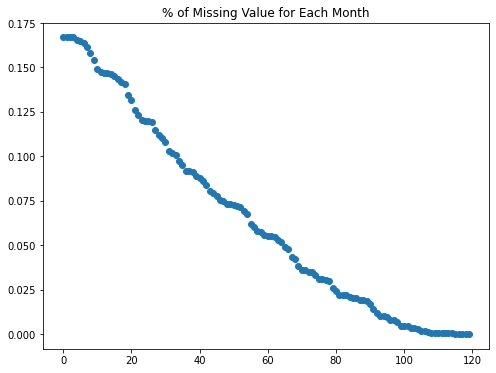

In [14]:
# Plot
plt.figure(figsize=(8, 6))
plt.scatter(range(0, month_nan.shape[0]),month_nan['nan_percent'])
plt.title("% of Missing Value for Each Month")
plt.show()

### **4.2 Companies**



#### 4.2.1 Functions

In [15]:
# Check if there is NaN for each company
def companyNanCheck(df: pd.DataFrame):
  company_nan = pd.DataFrame(df.isnull().sum(axis=1), columns=['nan_count'])
  company_nan['nan_percent'] = company_nan['nan_count'] / len(df.columns)
  # Print the companies with NaN
  with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(company_nan[company_nan['nan_count'] != 0])

In [16]:
# Count continuous NaN for each company
def countContigNan(originalD: pd.DataFrame):
  nanCountD = pd.DataFrame()
  for index, row in originalD.iterrows():
    mask = row.isna()
    d = originalD.columns[mask].to_series().groupby((~mask).cumsum()[mask]).agg(['first', 'size'])
    d = d.rename(columns=dict(size='Num of contig NaN', first='Start date')).reset_index(drop=True)
    d.insert(0, '公司', row.name)
    nanCountD = pd.concat([nanCountD, d]).reset_index(drop=True)
  
  return nanCountD

#### 4.2.2 金融業


In [17]:
# Check if there is NaN for each company
companyNanCheck(data_fin)

         nan_count  nan_percent
公司                             
5878 台名          7     0.058333


In [18]:
# Count continuous NaN for each company
fin_nan_count = countContigNan(data_fin)
fin_nan_count

,公司,Start date,Num of contig NaN
0,5878 台名,2013-01,7


In [19]:
# 非自 2013-01 開始連續缺值的公司
fin_nan_count1 = fin_nan_count[fin_nan_count['Start date'] != '2013-01']
fin_nan_count1

,公司,Start date,Num of contig NaN


#### 4.2.3 非金融業


In [20]:
# Check if there is NaN for each company
companyNanCheck(data_nonfin)

                nan_count  nan_percent
公司                                    
1240 茂生農經              50     0.416667
1264 德麥                10     0.083333
1268 漢來美食              31     0.258333
1340 勝悅-KY             10     0.083333
1341 富林-KY             70     0.583333
1342 八貫                78     0.650000
2069 運錩                22     0.183333
2070 精湛                33     0.275000
2115 六暉-KY              9     0.075000
2211 長榮鋼               81     0.675000
2236 百達-KY             27     0.225000
2239 英利-KY             31     0.258333
2241 艾姆勒               36     0.300000
2243 宏旭-KY             55     0.458333
2247 汎德永業              55     0.458333
2250 IKKA-KY           99     0.825000
2643 捷迅                 8     0.066667
2726 雅茗-KY             22     0.183333
2736 富野                 9     0.075000
2739 寒舍                19     0.158333
2740 天蔥                19     0.158333
2743 山富                21     0.175000
2745 五福                30     0.250000
2748 雲品                31

In [21]:
# Count continuous NaN for each company
nonfin_nan_count = countContigNan(data_nonfin)
nonfin_nan_count

,公司,Start date,Num of contig NaN
0,1240 茂生農經,2013-01,50
1,1264 德麥,2013-01,10
2,1268 漢來美食,2013-01,31
3,1340 勝悅-KY,2013-01,10
4,1341 富林-KY,2013-01,70
...,...,...,...
291,8481 政伸,2013-01,31
292,8482 商億-KY,2013-01,66
293,8488 吉源-KY,2013-01,46
294,8489 三貝德,2013-01,34


In [22]:
# 觀察有連續缺失值的 Start date 有哪些
print(nonfin_nan_count['Start date'].value_counts())

2013-01    296
Name: Start date, dtype: int64


In [23]:
# 非自 2013-01 開始連續缺值的公司
nonfin_nan_count1 = nonfin_nan_count[nonfin_nan_count['Start date'] != '2013-01']
nonfin_nan_count1

,公司,Start date,Num of contig NaN


### **4.3 Conclusion**


所有上市櫃公司都沒有中間突然缺失營收公告日者